          Comprehensive Analysis and Visualization of Iris Flower Classification Using Support Vector Machine


Import necessary libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


Load the Iris dataset

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Explore dataset structure and features

In [8]:
print("Features:", iris.feature_names)
print("Target variable:", iris.target_names)
print("Number of samples:", len(iris.data))
print("Number of features:", len(iris.feature_names))


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target variable: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Number of features: 4


Preprocessing the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Defining the SVM classifier

In [10]:
svm_classifier = SVC(kernel='linear')

Defining the number of folds for K-fold cross-validation

In [12]:
k_folds = 5

Initializing the K-fold cross-validation object

In [14]:
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

Applying K-fold cross-validation

In [15]:
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.91666667 1.         0.95833333 0.875      1.        ]
Mean accuracy: 0.95


Training the SVM model on the entire training dataset

In [16]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

Making predictions on the test set

In [17]:
predictions = svm_classifier.predict(X_test_scaled)

Calculating evaluation metrics

In [18]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

Printing evaluation metrics

In [19]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1-score: 0.9664109121909632


Printing classification report

In [20]:
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Visualization - Scattering plot to visualize the distribution of the Iris dataset

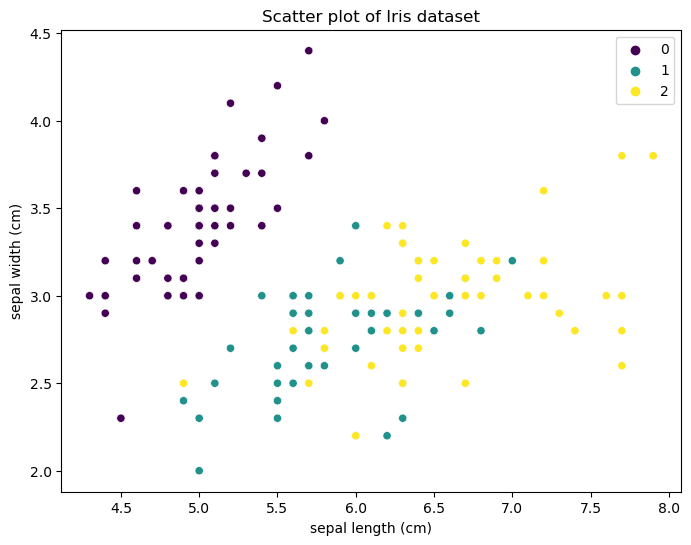

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target, palette='viridis', legend='full')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter plot of Iris dataset")
plt.show()

Confusion matrix to assess the model's performance visually

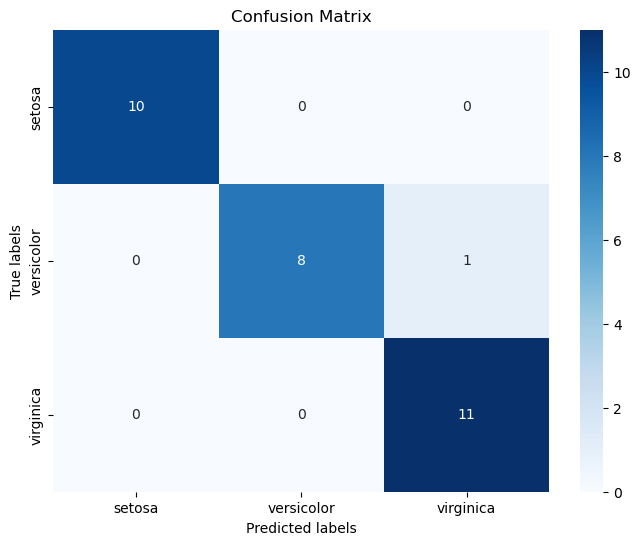

In [22]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()